In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score, recall_score, f1_score


In [16]:
# Reading in the dataset
df=pd.read_csv("File_mail_data.csv")
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [17]:
# Check the dataset infomation
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [18]:
# checking for the missing values or null values
df.isnull().sum()


Category    0
Message     0
dtype: int64

In [19]:
# Converting categories  to numerical
encoder=LabelEncoder()
category=df.select_dtypes(include=["object","category"])
for x in category:
    df[x]=encoder.fit_transform(df[x])
df.head()


,Category,Message
0,0,1080
1,0,3126
2,1,999
3,0,4121
4,0,2781


In [20]:
# sparating dependent from independent
x=df.drop(["Category"],axis=1) #independent variables
y=df["Category"] # dependent variables


In [21]:
x.head()
y.head()


0    0
1    0
2    1
3    0
4    0
Name: Category, dtype: int32

In [27]:
# Splitting the dataset into train and test
#  80% will be use for training the data while the 20% 
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=40)

In [23]:
print(x.shape)
print(xtrain.shape)
print(xtest.shape)

print(y.shape)
print(ytrain.shape)
print(ytest.shape)


(5572, 1)
(4457, 1)
(1115, 1)
(5572,)
(4457,)
(1115,)


In [51]:
# importing library 
from sklearn.pipeline import Pipeline

# All the model will be fit in a pipelie
Pipelines=[
      ([("KNeighborsCLass_Model       :",TfidfVectorizer()), ("Classifer",KNeighborsClassifier())]),
      ([("DecisionTreeClassifier_Model:",DecisionTreeClassifier())]),
      ([("LogisticRegression_Model    :",TfidfVectorizer()),("CLASSIFIER",LogisticRegression())]),
      ([("RandomForestClassifier_Model:",TfidfVectorizer()),("CLASSIFIER",RandomForestClassifier())]),
      ([("SVC_Model                   :",TfidfVectorizer()),("CLASSIFIER",SVC())]),
      ([("GaussianNB_Model            :",TfidfVectorizer()),("CLASSIFIER",GaussianNB())])
]

In [52]:
results = []
for name, pipeline in Pipelines.items():
    # Create a pipeline with TF-IDF vectorizer and the model
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('model', Pipelines)
    ])

AttributeError: 'list' object has no attribute 'items'

In [44]:
# Iterate over the Pipelines dictionary
for name, pipeline in Pipelines.items():
    try:
        pipeline.fit(xtrain, ytrain)
        print(f"{name} Fitted Successfully...")
    except ValueError as e:
        print(f"Error fitting {name}: {str(e)}")


AttributeError: 'list' object has no attribute 'items'

In [46]:
for name, pipeline in Pipelines.items():
    accuracy=pipeline.fit(xtrain,ytrain)
    print(F"{name} Fitted Successfully...")
    

AttributeError: 'list' object has no attribute 'items'

In [ ]:
# Checking the performance or accuracy of the  models in the pipeline
for name, pipeline in Pipelines.items():
    accuracy=pipeline.score(xtest,ytest)
    print(f"accuracy of {name}------------{accuracy:2f}")


accuracy of KNeighborsCLass_Model       :------------0.914798
accuracy of DecisionTreeClassifier_Model:------------0.921973
accuracy of LogisticRegression_Model    :------------0.868161
accuracy of RandomForestClassifier_Model:------------0.921973
accuracy of SVC_Model                   :------------0.868161
accuracy of GaussianNB_Model            :------------0.868161


EvaluatingKNeighborsCLass_Model       : on the testing data...


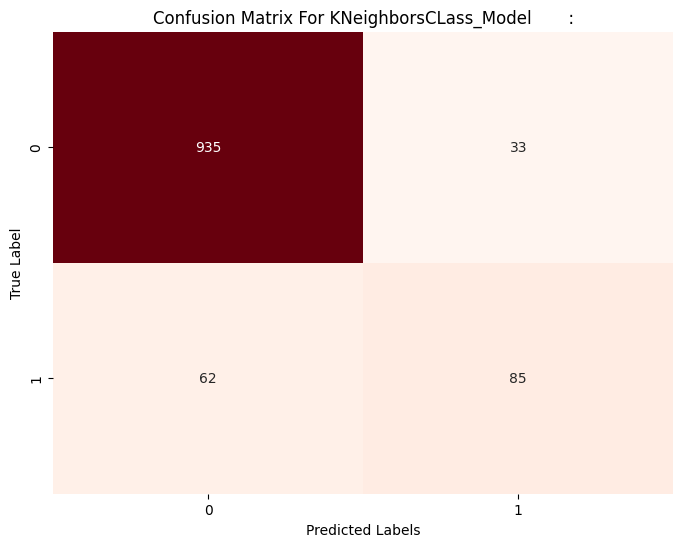

EvaluatingDecisionTreeClassifier_Model: on the testing data...


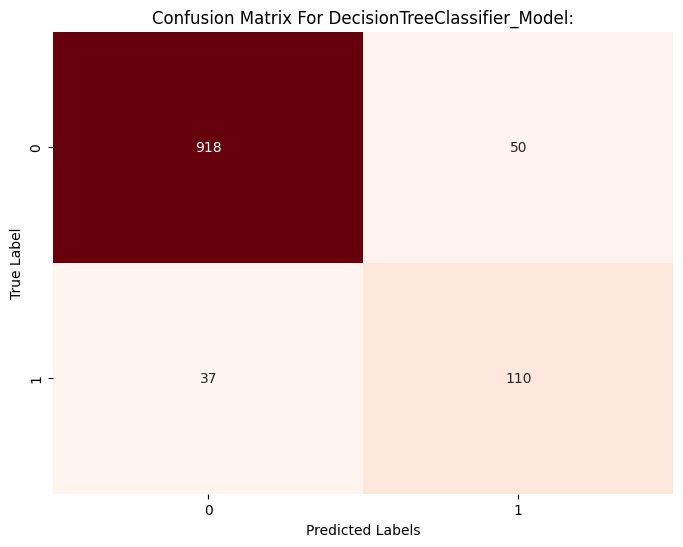

EvaluatingLogisticRegression_Model    : on the testing data...


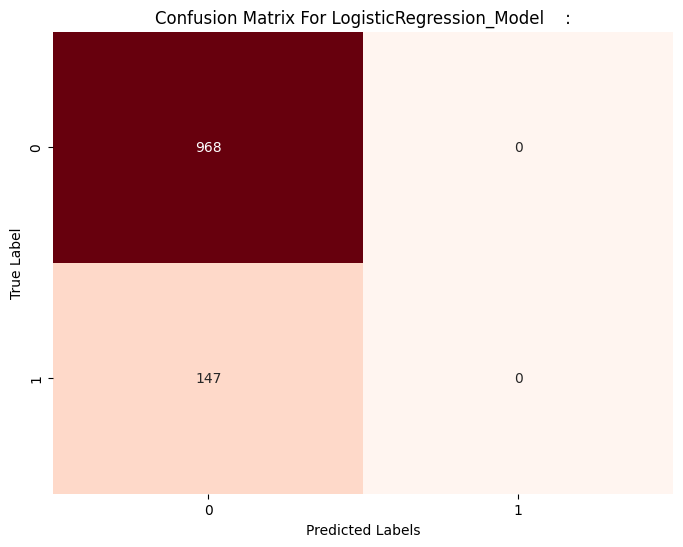

EvaluatingRandomForestClassifier_Model: on the testing data...


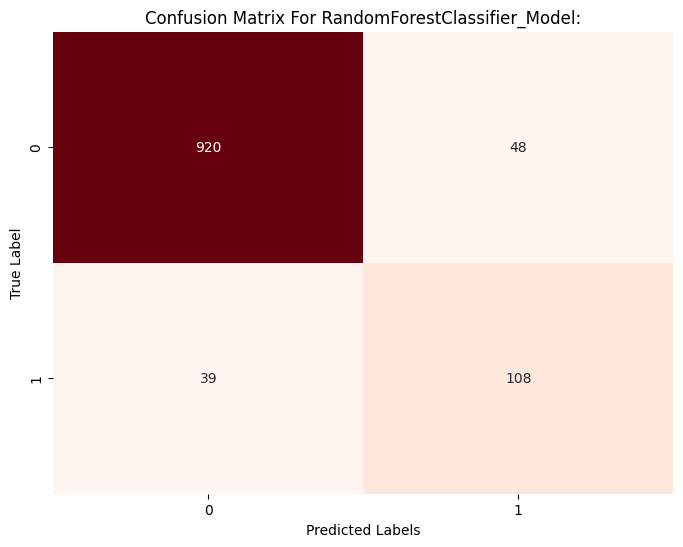

EvaluatingSVC_Model                   : on the testing data...


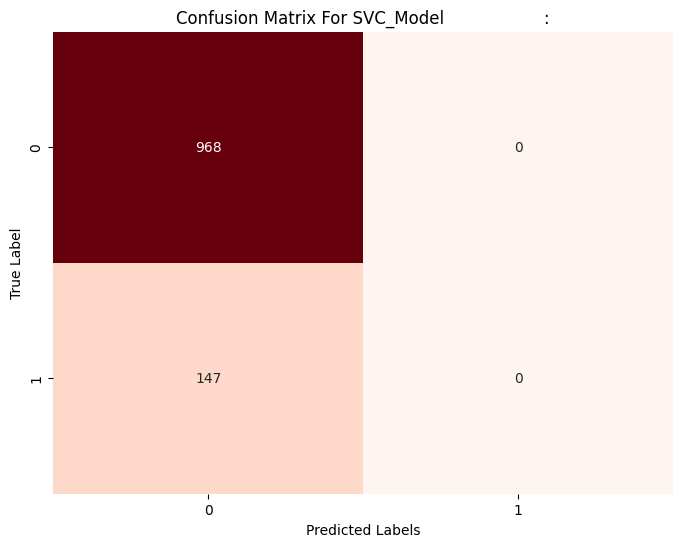

EvaluatingGaussianNB_Model            : on the testing data...


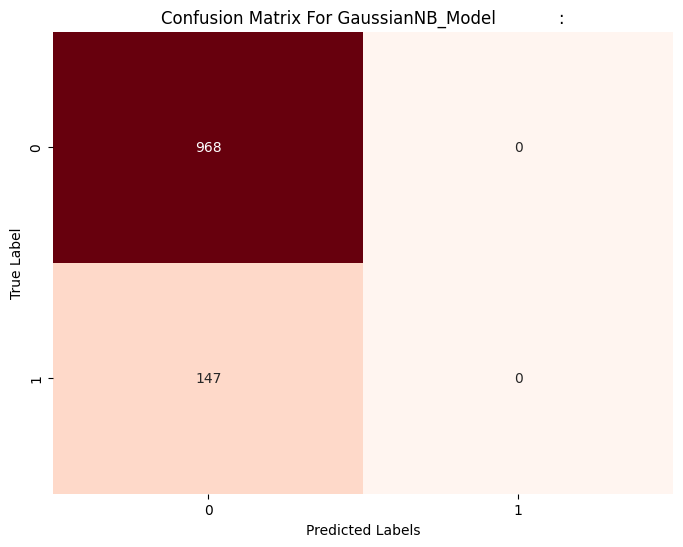

In [ ]:
    
for name, pipeline in Pipelines.items():
    print(f"Evaluating{name} on the testing data...")
    # predict the label for the testing data
    y_pred=pipeline.predict(xtest)
    # Generate the confusion matrix
    cm=confusion_matrix(ytest,y_pred)
    # plot the Confussion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True,fmt="d",cmap="Reds",cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix For {name}")
    plt.show()    
 

In [ ]:
# Importing joblib for saving the built models 
import joblib
    

In [ ]:
# Saving the built model
for name,pipeline in Pipelines.items():
    joblib.dump(pipeline,f"Model{name}.joblib")
    print(f"Model{name} saved successfully...\n")

ModelKNeighborsCLass_Model       : saved successfully...

ModelDecisionTreeClassifier_Model: saved successfully...

ModelLogisticRegression_Model    : saved successfully...

ModelRandomForestClassifier_Model: saved successfully...

ModelSVC_Model                   : saved successfully...

ModelGaussianNB_Model            : saved successfully...

